<a href="https://colab.research.google.com/github/jerovernay/Laboratorio1/blob/main/Tp1/Tp1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Importar bibliotecas**

In [9]:
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  ## para el ajuste
import random as rd

### Calculamos moda, mediana y moda con desviacion estandar

In [12]:
datos_pedro = np.loadtxt('tiempos200_pedro.txt')
datos_jero = np.loadtxt('tiempos200_jero.txt')

P = len(datos_pedro)
J = len(datos_jero)

print(P)
print(J)

datos_40_pedro = rd.sample(list(datos_pedro), 40)
datos_40_jero = rd.sample(list(datos_jero), 40)

std_pedro = np.std(datos_40_pedro)
std_jero = np.std(datos_40_jero)

print(std_pedro)
print(std_jero)

# Nos quedamos con el de pedro

200
198
0.08893046440899767
0.09257780173994197


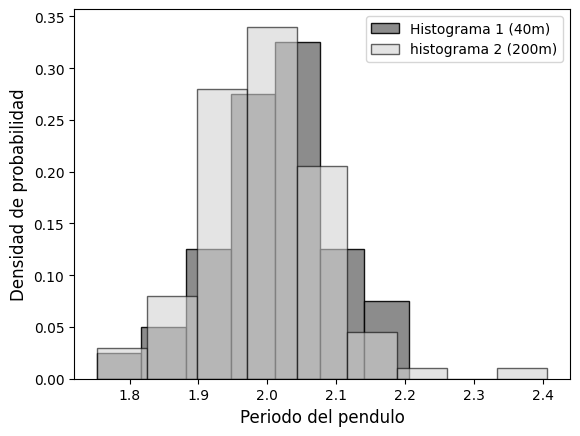

In [17]:
# Realizamos el histograma

alturas_40 , bins01 = np.histogram(datos_40_pedro, bins = 'sturges')
frecuencias_40 = alturas_40 / len(datos_40_pedro)
ancho_de_bin_01 = bins01[1] - bins01[0]

alturas_200, bins_02, = np.histogram(datos_pedro, bins = 'sturges')
frecuencias_200 = alturas_200 / len(datos_pedro)
ancho_de_bin_02 = bins_02[1] - bins_02[0]

plt.bar(bins01[:-1], frecuencias_40, align='edge', width=ancho_de_bin_01, alpha=0.9, label='Histograma 1 (40m)', color='gray', edgecolor='black' )
plt.bar(bins_02[:-1], frecuencias_200, align='edge', width=ancho_de_bin_02, alpha=0.6, label='histograma 2 (200m)', color='lightgray', edgecolor='black' )
plt.legend()
#plt.grid(True)
plt.xlabel('Periodo del pendulo', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.show()

### **2. Cargar los datos**

In [ ]:
# Datos (supongamos que estos datos corresponden al centro y altura de cada barra del histograma)
X = np.array([1.464, 1.548, 1.632, 1.716, 1.8, 1.884, 1.968, 2.052, 2.136])
Y = np.array([0, 3, 31, 86, 118, 69, 47, 5, 1])

### **3. Definir función gaussiana**

gaussiana define la función:  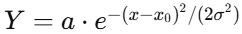


In [ ]:
def gaussiana(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

### **4. Ajuste de los datos con una función gaussiana**

curve_fit encuentra los mejores parámetros *a*, *x0* y sigma. El argumento p0 se usa para proporcionar los valores iniciales de los parámetros que queremos ajustar. Esto ayuda al algoritmo a empezar la optimización cerca de una solución razonable.

p0 = [120, 1.8, 0.1] significa:
120 → valor inicial de la amplitud  *a* de la gaussiana (altura máxima).
1.8 → valor inicial del centro *x0* de la gaussiana (dónde está el pico).
0.1 → valor inicial del ancho  𝜎 de la gaussiana (qué tan ancha es la curva).


In [ ]:
# Ajuste
parametros, covarianza = curve_fit(gaussiana, X, Y, p0=[120, 1.8, 0.1])
a, x0, sigma = parametros

# Calcular incerteza (desviación estándar) de cada parámetro
incerteza = np.sqrt(np.diag(covarianza))

# En el print mostramos los valores ajustados con su incerteza (criterio de 2 cifras significativas en el error).
# CUIDADO: hay que definir el número de decimales en función del resultado obtenido
print(f"Parámetros ajustados:")
print(f"Amplitud a = {a:.1f} ± {incerteza[0]:.1f}")
print(f"Centro x0 = {x0:.4f} ± {incerteza[1]:.4f}")
print(f"Sigma = {sigma:.4f} ± {incerteza[2]:.4f}")

Parámetros ajustados:
Amplitud a = 112.5 ± 7.0
Centro x0 = 1.7983 ± 0.0078
Sigma = 0.1081 ± 0.0078


### **5. Graficamos los datos y la curva de ajuste**

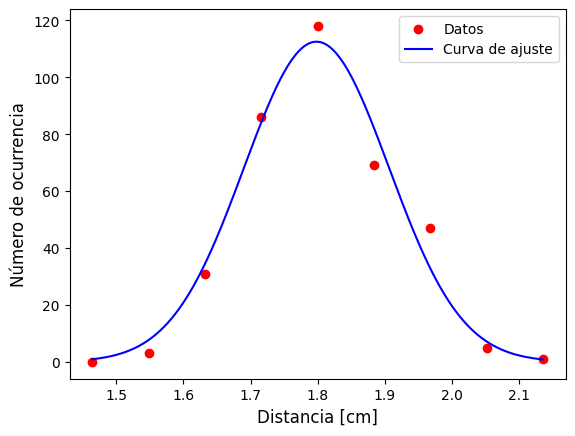

In [ ]:
X_ajuste = np.linspace(min(X), max(X), 500)
Y_ajuste = gaussiana(X_ajuste, a, x0, sigma)

plt.scatter(X, Y, color='red', label='Datos')
plt.plot(X_ajuste, Y_ajuste, color='blue', label='Curva de ajuste')
plt.xlabel('Distancia [cm]', fontsize=12)          # nombre eje x
plt.ylabel('Número de ocurrencia', fontsize=12)   # nombre eje y
# plt.title('Ajuste Gaussiano de Y vs X')  #si quiero escribir un título en el gráfico
plt.legend()
plt.show()